# Regressão Softmax com dados do MNIST utilizando gradiente descendente estocástico por minibatches

O objetivo deste notebook é ilustrar
- o uso do gradiente estocástico por mini-batchs
- utilizando as classes Dataset e DataLoater.

A apresentação da perda nos gráficos é um pouco diferente da usual, mostrando a perda de cada um dos vários minibatches dentro de cada época, de forma que as épocas são apresentadas com valores fracionários.

## Importação das bibliotecas

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import torch
from torch.autograd import Variable
from torch.utils.data import DataLoader

import torchvision
from torchvision.datasets import MNIST

## Dataset e dataloader

### Definição do tamanho do minibatch

In [2]:
batch_size = 100

### Carregamento, criação dataset e do dataloader

In [3]:
dataset_dir = 'MNIST/'

dataset_train = MNIST(dataset_dir, train=True, download=True,
                      transform=torchvision.transforms.ToTensor())

loader_train = DataLoader(dataset_train, batch_size=batch_size, shuffle=True)

print('Número de minibatches de trenamento:', len(loader_train))

x_train, y_train = next(iter(loader_train))
print("\nDimensões dos dados de um minibatch:", x_train.size())
print("Valores mínimo e máximo dos pixels: ", torch.min(x_train), torch.max(x_train))
print("Tipo dos dados das imagens:         ", type(x_train))
print("Tipo das classes das imagens:       ", type(y_train))

100.0%
100.0%
100.0%
100.0%

Número de minibatches de trenamento: 600

Dimensões dos dados de um minibatch: torch.Size([100, 1, 28, 28])
Valores mínimo e máximo dos pixels:  tensor(0.) tensor(1.)
Tipo dos dados das imagens:          <class 'torch.Tensor'>
Tipo das classes das imagens:        <class 'torch.Tensor'>


### Usando todas as amostras do MNIST

Neste exemplo utilizaremos todas as amostras de treinamento.

In [5]:
print('Número de minibatches de trenamento:', len(loader_train))
n_batches_train = len(loader_train)
total_samples = dataset_train.data.size(0)

Número de minibatches de trenamento: 600


## Modelo

In [6]:
model = torch.nn.Linear(28*28, 10)

In [7]:
x = torch.ones(28*28).reshape(1, 784)
print(x.shape)
predict = model(x)
predict

torch.Size([1, 784])


tensor([[ 0.1456,  0.9120,  0.6210,  0.0356,  1.0360, -0.0957,  0.2116, -0.1361,
         -0.5138,  0.7714]], grad_fn=<AddmmBackward0>)

## Treinamento

### Inicialização dos parâmetros

In [8]:
n_epochs = 5
learningRate = 0.5

# Utilizaremos CrossEntropyLoss como função de perda
criterion = torch.nn.CrossEntropyLoss()

# Gradiente descendente
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

### Laço de treinamento dos parâmetros

In [9]:
epochs = []
losses = []

total_trained_samples = 0
for i in range(n_epochs):
    for k,(x_train, y_train) in enumerate(loader_train):
        # Transforma a entrada para uma dimensão
        inputs = Variable(x_train.view(-1, 28 * 28))
        # predict da rede
        outputs = model(inputs)

        # calcula a perda
        loss = criterion(outputs, Variable(y_train))

        # zero, backpropagation, ajusta parâmetros pelo gradiente descendente
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_trained_samples += x_train.size(0)
        epochs.append(total_trained_samples / total_samples)
        losses.append(loss.data)

In [10]:
print('Final loss:', loss.data)

Final loss: tensor(0.2846)


### Visualizando gráfico de perda durante o treinamento

Text(0.5, 0, 'época')

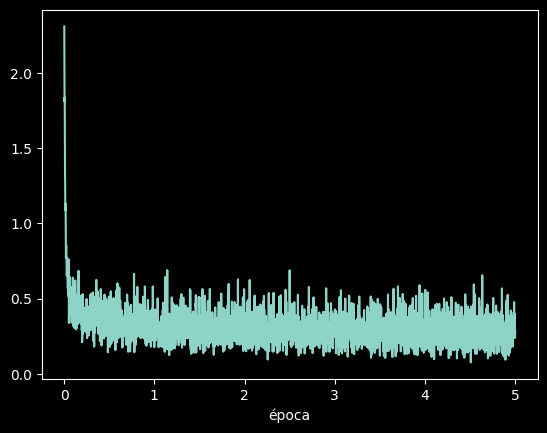

In [11]:
plt.plot(epochs, losses)
plt.xlabel('época')

### Visualização usual da perda, somente no final de cada minibatch

Text(0.5, 0, 'época')

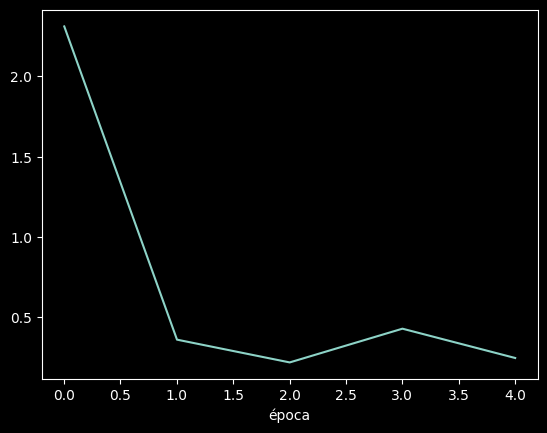

In [12]:
plt.plot(epochs[:5 * n_batches_train +1:n_batches_train], losses[:5 * n_batches_train+1:n_batches_train])
plt.xlabel('época')

# Atividades

## Perguntas

1. Qual é o tamanho do mini-batch?  
r = O tamanho do mini-batch é 100, conforme definido pela variável batch_size.  

2. Em uma época, quantos mini-batches existem?  
r = O conjunto de treinamento do MNIST possui 60.000 amostras.
O tamanho do mini-batch é 100.
Portanto, o número de mini-batches em uma época é:  
`n_batches = total_samples / batch_size = 60000 / 100 = 600`

3. Qual é a definição de época?  
r = Uma época é definida como uma iteração completa sobre todo o conjunto de dados de treinamento. Isso significa que, durante uma época, o modelo processa todas as amostras do conjunto de treinamento, divididas em mini-batches, uma vez. No caso deste notebook, como o conjunto de treinamento possui 60.000 amostras e o tamanho do mini-batch é 100, uma época corresponde ao processamento de todos os 600 mini-batches.

## Exercícios


1. Coloque um print no final de cada minibatch, no mesmo estilo do print do final de época, no seguinte estilo:
    - Época: 1/4, batch: 600

In [14]:
for i in range(n_epochs):
    for k, (x_train, y_train) in enumerate(loader_train):
        inputs = Variable(x_train.view(-1, 28 * 28))
        outputs = model(inputs)

        loss = criterion(outputs, Variable(y_train))

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_trained_samples += x_train.size(0)
        epochs.append(total_trained_samples / total_samples)
        losses.append(loss.data)

        print(f"Época: {i+1}/{n_epochs}, batch: {k+1}/{n_batches_train}")

Época: 1/5, batch: 1/600
Época: 1/5, batch: 2/600
Época: 1/5, batch: 3/600
Época: 1/5, batch: 4/600
Época: 1/5, batch: 5/600
Época: 1/5, batch: 6/600
Época: 1/5, batch: 7/600
Época: 1/5, batch: 8/600
Época: 1/5, batch: 9/600
Época: 1/5, batch: 10/600
Época: 1/5, batch: 11/600
Época: 1/5, batch: 12/600
Época: 1/5, batch: 13/600
Época: 1/5, batch: 14/600
Época: 1/5, batch: 15/600
Época: 1/5, batch: 16/600
Época: 1/5, batch: 17/600
Época: 1/5, batch: 18/600
Época: 1/5, batch: 19/600
Época: 1/5, batch: 20/600
Época: 1/5, batch: 21/600
Época: 1/5, batch: 22/600
Época: 1/5, batch: 23/600
Época: 1/5, batch: 24/600
Época: 1/5, batch: 25/600
Época: 1/5, batch: 26/600
Época: 1/5, batch: 27/600
Época: 1/5, batch: 28/600
Época: 1/5, batch: 29/600
Época: 1/5, batch: 30/600
Época: 1/5, batch: 31/600
Época: 1/5, batch: 32/600
Época: 1/5, batch: 33/600
Época: 1/5, batch: 34/600
Época: 1/5, batch: 35/600
Época: 1/5, batch: 36/600
Época: 1/5, batch: 37/600
Época: 1/5, batch: 38/600
Época: 1/5, batch: 39

2. Altere o tamanho de minibatch (batch_size) algumas vezes, refaça o treinamento, e compare no gráfico abaixo a queda da perda para cada tamanho de minibatch.

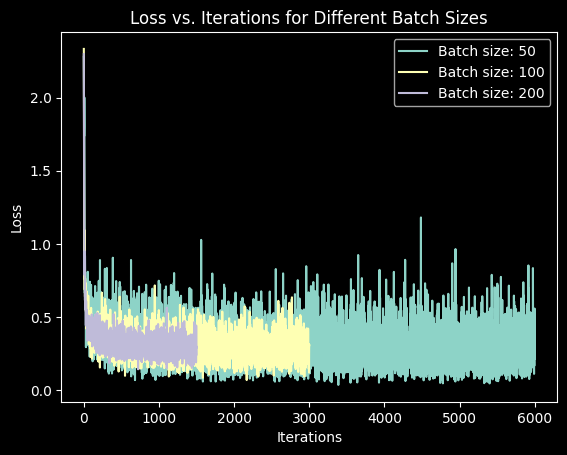

In [15]:
batch_sizes = [50, 100, 200]
losses_dict = {}

for bs in batch_sizes:
    # Update the batch size
    loader_train = DataLoader(dataset_train, batch_size=bs, shuffle=True)
    n_batches_train = len(loader_train)

    # Reinitialize the model, optimizer, and loss tracking
    model = torch.nn.Linear(28 * 28, 10)
    optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)
    losses = []

    for epoch in range(n_epochs):
        for k, (x_train, y_train) in enumerate(loader_train):
            inputs = Variable(x_train.view(-1, 28 * 28))
            outputs = model(inputs)
            loss = criterion(outputs, Variable(y_train))

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            losses.append(loss.data)

    losses_dict[bs] = losses

for bs, loss_values in losses_dict.items():
    plt.plot(range(len(loss_values)), loss_values, label=f'Batch size: {bs}')

plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss vs. Iterations for Different Batch Sizes')
plt.show()

## Conclusões sobre os experimentos deste notebook


1. **Impacto do tamanho do minibatch**:
    - Observou-se que o tamanho do minibatch influencia a convergência da perda durante o treinamento.
    - Minibatches menores tendem a apresentar maior variabilidade na perda entre as iterações, mas podem explorar melhor o espaço de parâmetros.
    - Minibatches maiores apresentam uma convergência mais estável, mas podem levar mais tempo para encontrar o ótimo global.

2. **Convergência da perda**:
    - A perda diminuiu consistentemente ao longo das épocas, indicando que o modelo foi capaz de aprender a partir dos dados.
    - A taxa de aprendizado (learning rate) de 0.5 foi suficiente para garantir uma boa convergência sem oscilações significativas.

3. **Uso do gradiente descendente estocástico**:
    - O uso do gradiente descendente estocástico com minibatches mostrou-se eficaz para treinar o modelo em um conjunto de dados grande como o MNIST.
    - A divisão em minibatches permitiu um treinamento eficiente, mesmo com recursos computacionais limitados.

4. **Visualização da perda**:
    - A visualização da perda ao longo das iterações e épocas ajudou a entender o comportamento do modelo durante o treinamento.
    - Comparar diferentes tamanhos de minibatches no gráfico forneceu insights sobre o impacto dessa escolha no desempenho do modelo.

5. **Modelo linear**:
    - O modelo linear utilizado (uma camada totalmente conectada) foi capaz de aprender a classificar os dígitos do MNIST, mas melhorias podem ser alcançadas com arquiteturas mais complexas, como redes neurais convolucionais.